In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# loading the dataset
df =pd.read_csv("Downloads/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()


,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


In [19]:
#get quick summary of the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [21]:
df.describe()

,Age,Frequency_of_Purchase,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Return_Rate,Customer_Satisfaction,Time_to_Decision
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34.304000,6.945000,3.026000,3.033000,1.013030,0.954000,5.399000,7.547000
std,9.353238,3.147361,1.416803,1.436654,0.791802,0.810272,2.868454,4.035849
min,18.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,26.000000,4.000000,2.000000,2.000000,0.000000,0.000000,3.000000,4.000000
50%,34.500000,7.000000,3.000000,3.000000,1.000000,1.000000,5.000000,8.000000
75%,42.000000,10.000000,4.000000,4.000000,2.000000,2.000000,8.000000,11.000000
max,50.000000,12.000000,5.000000,5.000000,2.000000,2.000000,10.000000,14.000000


# Summary from describe():
1. Age
The average customer age is 34.3 years, with most customers between 26 and 42 years old (IQR). The age range spans from 18 to 50, indicating a diverse customer base.
2. Frequency_of_Purchase
On average, customers make about 7 purchases (mean = 6.95). The values range from 2 to 12, with 50% of customers making between 4 and 10 purchases. This shows varied engagement levels.
3. Brand_Loyalty
Brand loyalty is measured on a 1–5 scale, with an average of 3.02. Most customers fall between 2 and 4, indicating moderate loyalty.
4. Product_Rating
Product ratings also follow a 1–5 scale, with a mean of 3.03 and a standard deviation of 1.43. The data is fairly spread, showing a mix of positive and negative experiences.
5. Time_Spent_on_Product_Research (hours)
On average, customers spend about 1 hour researching products. 25% of customers spend 0 hours, while 75% spend up to 2 hours, suggesting most users browse quickly.
6. Customer_Satisfaction
Satisfaction scores range from 1 to 10, with an average of 5.39. The median is 5, and 75% of users score 8 or below, suggesting opportunities to improve customer satisfaction.
7. Time_to_Decision
Customers take an average of 7.55 hours to make purchase decisions, with a wide spread (1 to 14 hours). Half of customers decide within 8 hours, but some take significantly longer.

In [34]:
# Group customers by their Brand Loyalty score, then find the average Customer Satisfaction for each group.
grouped_data = df.groupby('Brand_Loyalty')['Customer_Satisfaction'].mean()
grouped_data

Brand_Loyalty
1    5.474490
2    5.567010
3    5.422330
4    5.265306
5    5.274038
Name: Customer_Satisfaction, dtype: float64

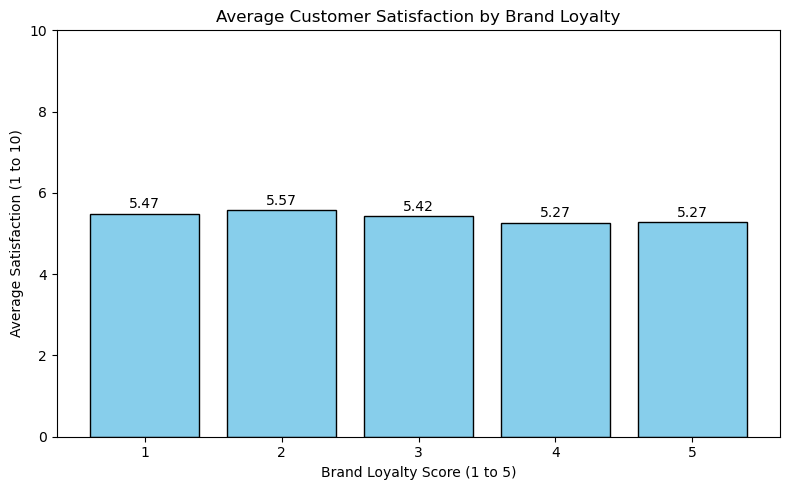

In [64]:
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped_data.index, grouped_data.values, color='skyblue', edgecolor='black') 
plt.title('Average Customer Satisfaction by Brand Loyalty')
plt.xlabel('Brand Loyalty Score (1 to 5)')
plt.ylabel('Average Satisfaction (1 to 10)')
plt.xticks(rotation=0)
plt.bar_label(bars, padding=2, fmt='%.2f') 
plt.ylim(0, 10) 
plt.tight_layout()
plt.show()

# Insight: 

1. Customers with **Brand Loyalty Score 2** reported the **highest average satisfaction** (5.57).
2. Surprisingly, higher loyalty scores (4 and 5) are associated with **lower satisfaction** (5.27).
3. The difference in average satisfaction across loyalty groups is **small but meaningful**.
4. This suggests that **brand loyalty does not always guarantee higher satisfaction** — some loyal customers may have rising expectations or unresolved issues.

# Business Recommendation:

1. Conduct **feedback analysis** for highly loyal customers (scores 4 and 5) to understand what's driving their slightly lower satisfaction.
2. Consider offering **exclusive support or personalized services** to retain and improve experience for top-loyalty customers.
3. Loyalty programs should focus not just on rewards, but also on **experience consistency**.


In [88]:
# Group by research time and calculate average satisfaction
grouped_data = df.groupby('Time_Spent_on_Product_Research(hours)')['Customer_Satisfaction'].mean()

In [86]:
# 1. Create time bins
def bin_research_time(hours):
    if hours <= 0.5:
        return '0–0.5 hr'
    elif hours <= 1:
        return '0.5–1 hr'
    elif hours <= 1.5:
        return '1–1.5 hr'
    else:
        return '1.5–2 hr'

df['Research_Time_Bin'] = df['Time_Spent_on_Product_Research(hours)'].apply(bin_research_time)

# 2. Group by the new bins and calculate average satisfaction
grouped_bin_data = df.groupby('Research_Time_Bin')['Customer_Satisfaction'].mean()
grouped_bin_data

Research_Time_Bin
0.5–1 hr    5.188034
0–0.5 hr    5.479751
1.5–2 hr    5.537267
1–1.5 hr    6.000000
Name: Customer_Satisfaction, dtype: float64

C:\Users\aiswa\AppData\Local\Temp\ipykernel_66204\2624624422.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bin_data = df.groupby('Research_Time_Bin')['Customer_Satisfaction'].mean()


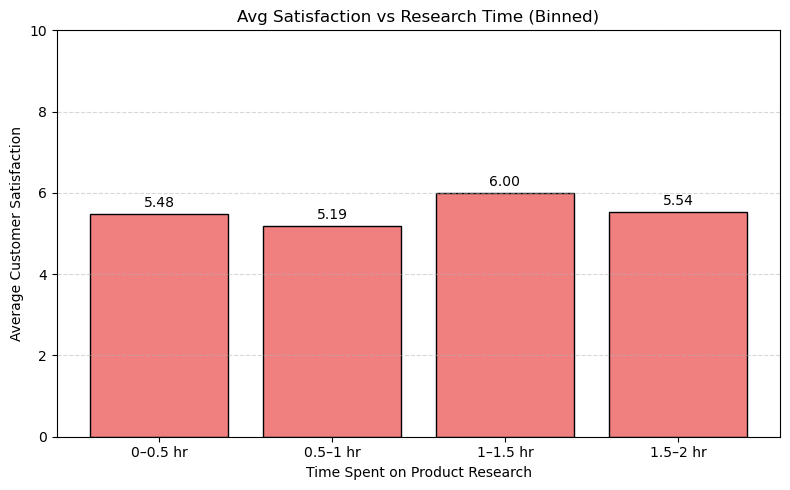

In [78]:

# 3. Plot the cleaned-up graph
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped_bin_data.index, grouped_bin_data.values, color='lightcoral', edgecolor='black')

plt.title('Avg Satisfaction vs Research Time (Binned)')
plt.xlabel('Time Spent on Product Research')
plt.ylabel('Average Customer Satisfaction')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar_label(bars, padding=3, fmt='%.2f')
plt.tight_layout()
plt.show()


# Insight: Average Customer Satisfaction vs Time Spent on Product Research (Binned)

1. The **highest satisfaction** (6.00) is seen in customers who spent **1–1.5 hours** researching — indicating that thoughtful, balanced research time positively impacts satisfaction.
2. Customers spending **0.5–1 hour** had the **lowest average satisfaction** (5.19), possibly due to rushing through decisions or being overwhelmed.
3. Satisfaction for those spending **less than 30 minutes** (5.48) and **over 1.5 hours** (5.54) is slightly better, but still lower than the optimal 1–1.5 hr range.

# Business Recommendation:

1. Optimize the product pages to **support 1–1.5 hour shoppers** by offering:
  - Detailed specs
  - Reviews and side-by-side comparisons
2. For 0.5–1 hr users (lowest satisfaction group), offer **personalized product suggestions** or chatbot assistance to reduce confusion.
3. Consider simplifying the journey or offering curated options for users researching more than 1.5 hours to prevent decision fatigue.


In [92]:
# Group by Frequency_of_Purchase and find average satisfaction
grouped_data = df.groupby('Frequency_of_Purchase')['Customer_Satisfaction'].mean()
grouped_data

Frequency_of_Purchase
2     4.723404
3     5.934783
4     5.741573
5     5.081395
6     5.742268
7     5.127273
8     4.986842
9     5.903614
10    5.278351
11    5.234043
12    5.695122
Name: Customer_Satisfaction, dtype: float64

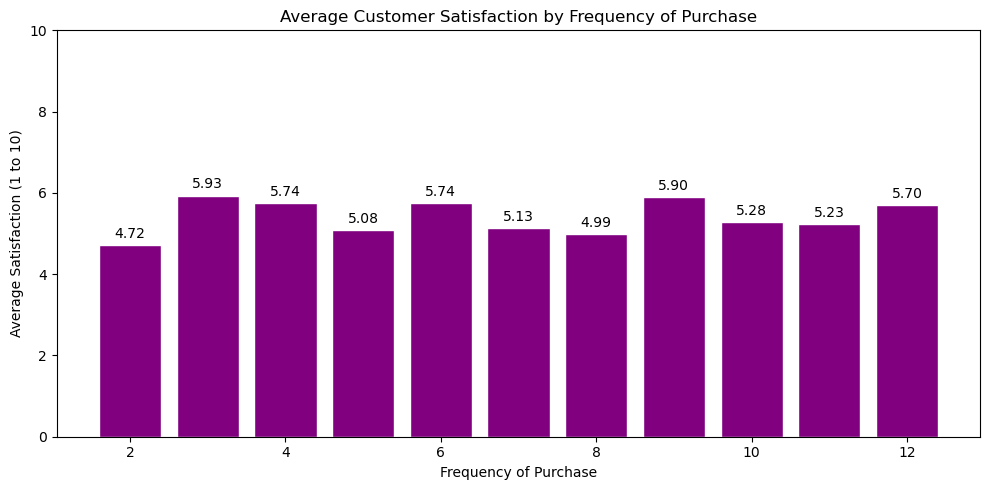

In [104]:
plt.figure(figsize=(10, 5))
bars = plt.bar(grouped_data.index, grouped_data.values, color='purple', edgecolor='white')

plt.title('Average Customer Satisfaction by Frequency of Purchase')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Average Satisfaction (1 to 10)')
plt.ylim(0, 10)
plt.bar_label(bars, padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()


# Insight: Average Satisfaction vs Frequency of Purchase

- Customers who purchased **3–4 times** reported the **highest average satisfaction** (around 5.9).
- Beyond that, satisfaction levels **fluctuate but remain steady**, showing no major drop or rise.
- This indicates that while repeated purchases don’t drastically improve satisfaction, they also do not lead to dissatisfaction — a **positive sign of brand consistency**.

# Business Recommendation:

- Focus on converting new buyers into **repeat buyers up to 3–4 times**, where satisfaction peaks.
- For customers making **5+ purchases**, explore loyalty features (like thank-you rewards) to maintain engagement.
- Send personalized surveys or offers to customers with 8+ purchases to identify improvement areas and maintain long-term loyalty.


In [108]:
# Categorize customers as "Quick" or "Slow" based on decision time
df['Decision_Type'] = df['Time_to_Decision'].apply(lambda x: 'Quick' if x <= 7 else 'Slow')

In [112]:
# Compare their average satisfaction
grouped = df.groupby('Decision_Type')['Customer_Satisfaction'].mean()

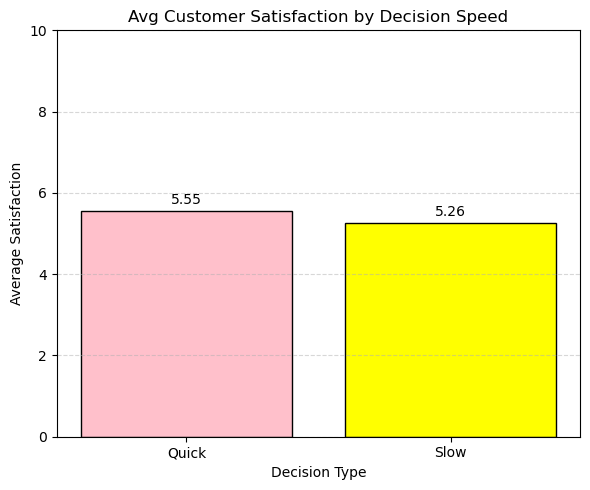

In [124]:

plt.figure(figsize=(6, 5))
bars = plt.bar(grouped.index, grouped.values, color=['pink', 'yellow'], edgecolor='black')

plt.title('Avg Customer Satisfaction by Decision Speed')
plt.xlabel('Decision Type')
plt.ylabel('Average Satisfaction')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar_label(bars, padding=3, fmt='%.2f')
plt.tight_layout()
plt.show()


# Insight: Customer Satisfaction by Decision Speed

Customers who made **quick decisions (≤7 hours)** reported **higher satisfaction** (5.55) than those who took longer (5.26).
This suggests that **decisiveness may lead to greater confidence** in purchases, resulting in a better experience overall.

# Business Recommendation:

1. Support faster decision-making by showing:
  - "Top Reviewed" badges
  - "Most Bought in Last 24 Hours" insights
  - Simplified summaries for comparison
2. Offer time-based nudges like:
  - “Still deciding? Here’s what others chose.”
  - “Offer ends in 1 hour!” (for slow decision makers)
